Pontificia Universidad Católica de Chile <br>
Departamento de Ciencia de la Computación <br>
IIC2433 - Minería de Datos <br>
Primer Semestre 2025 <br>

<h1><center>Tarea 3</center></h1>
<h1><center>Vicente Lavagnino</center></h1>


Profesor: Marcelo Mendoza<br>
Fecha de entrega: 07 de Mayo del 2025



## Indicaciones

Se debe entregar **SOLO** el archivo .ipynb en el buzón respectivo en canvas.

**IMPORTANTE**:
- Se asignará puntaje por el código implementado y los comentarios asociados a resultados.
- El notebook debe tener todas las celdas de código ejecutadas.
- El carácter de esta tarea es INDIVIDUAL.


**NOMBRE ESTUDIANTE:**

## Librerías

In [150]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from collections import Counter

from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import classification_report, f1_score, confusion_matrix, ConfusionMatrixDisplay

from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

##Importa acá las librerias que vayas a utilizar

## Introducción

El conjunto de datos cuenta con un total de 785 columnas. La columna "label" indica la clase a la que pertenece cada registro, es decir, el tipo de prenda representada en la imagen. A continuación, se detallan las clases asociadas a esta columna y su correspondencia numérica:

0: T-shirt/top

1: Trouser

2: Pullover

3: Dress

4: Coat

5: Sandal

6: Shirt

7: Sneaker

8: Bag

9: Ankle boot

Por otra parte, las columnas cuyo nombre comienza con "pixel" representan las características de cada imagen. En total, hay 784 columnas de este tipo, las cuales representan imágenes de tamaño 28 x 28 píxeles.


# Parte 1: Carga y Preprocesamiento de Datos (8 puntos)

En esta primera etapa, se debe cargar el conjunto de datos y luego analizar el comportamiento de algunas variables de interés. Posteriormente, se deberá llevar a cabo el proceso de normalización de los datos.



## 1.1 Carga de Datos (3 puntos)

Cargue el conjunto de datos utilizando la función read_csv de la biblioteca pandas y asígnelo a la variable df.
¿Cuántos registros (artículos) contiene el dataset?

Luego, grafique la cantidad de productos por clase utilizando la columna label.
¿El conjunto de datos está balanceado en cuanto a la distribución de clases?

RESPUESTA

En primer lugar importamos el dataset con read_csv y luego graficamos la cantidad de productos por clase utilizando la columna label. 

Vemos que el dataset tiene 12600 registros, es decir, 12600 artículos. (1260 en total con el header)

Respecto a esto podemos ver la distribución de clases en la imagen generada y la cantidad de datos por clase, notando claramente que el dataset está más cargado de datos asociados al label Coat, Sandal y Bag, mientras que los labesl Shirt y Pullover tienen una cantidad de datos muy baja en comparación.

De esta manera podemos decir que el dataset no está balanceado en cuanto a la distribución de clases.

   label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0      5       0       0       0       0       0       0       0       0   
1      9       0       0       0       0       0       0       0       0   
2      4       0       0       0       0       0       0       0       0   
3      3       0       0       0       0       0       0       0       0   
4      7       0       0       0       0       0       0       0       0   

   pixel9  ...  pixel775  pixel776  pixel777  pixel778  pixel779  pixel780  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...       122         0         0         1         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel781  pixel782  pixel783  pixel784  
0         0         0         

/var/folders/tp/1ddrt8cs1ml33c8ysvfd7tfr0000gn/T/ipykernel_42471/1041675446.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='label', data=df, palette='tab10')


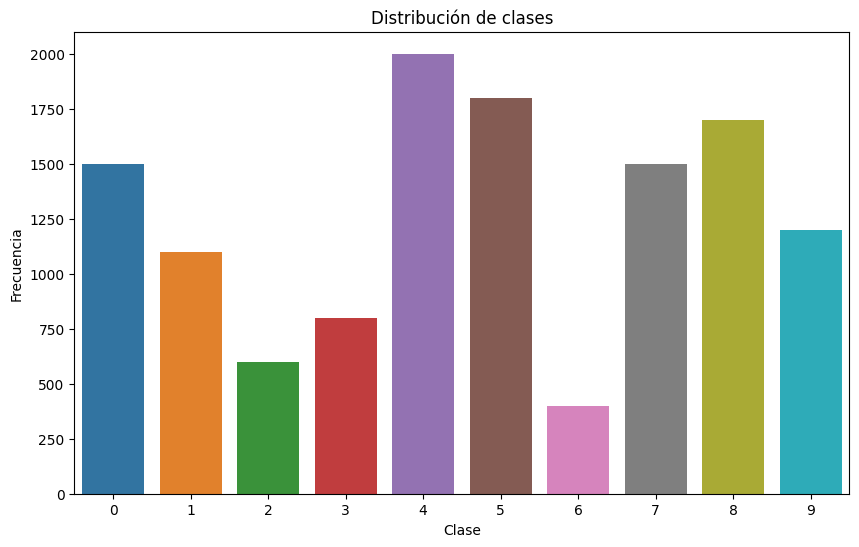

In [ ]:
# Cargamos el conjunto de datos

df = pd.read_csv('Clothing_Image_Pixels.csv')

# Mostramos las primeras filas del conjunto de datos
print(df.head())
print("Dimensiones:", df.shape)

# Mostramos información general del conjunto de datos
print(df.info())

# Distribución de clases
plt.figure(figsize=(10, 6))
sns.countplot(x='label', data=df, palette='tab10')
plt.title('Distribución de clases')
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.show()

**Observación:**

Utilice la siguiente celda de código para graficar las imágenes.

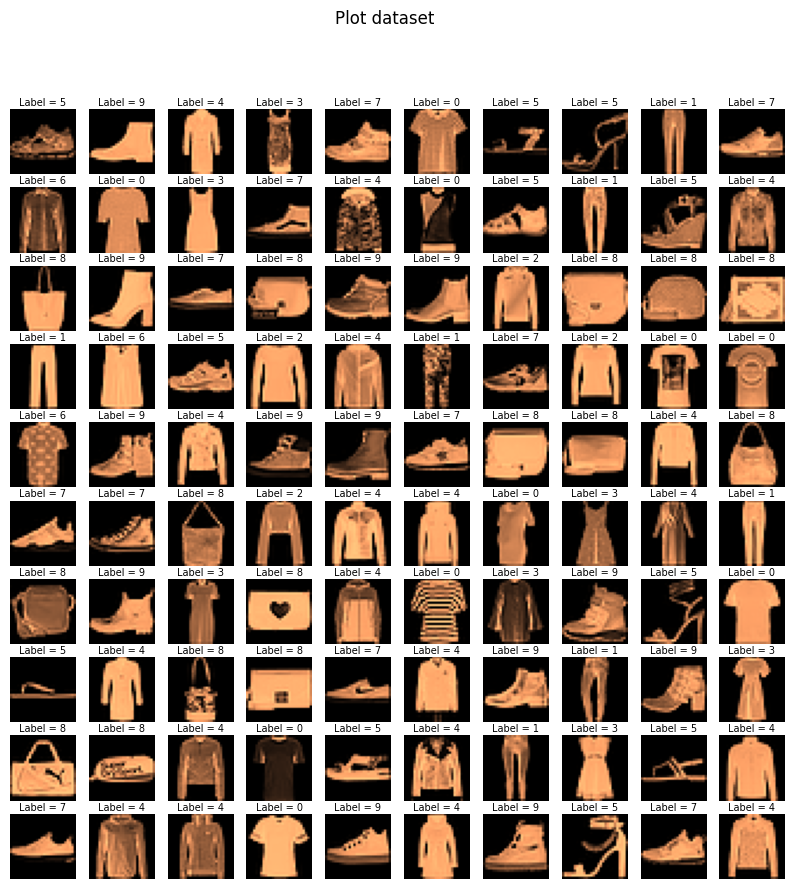

In [18]:
#Se separa el dataset en label (y) y variables explicativas (X).
y = df.label.copy()
X = df.drop("label",axis=1)
# Graficar ejemplos
fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(10, 10))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X.to_numpy()[idx].reshape((28, 28)), cmap=plt.cm.copper) #notar que el dataframe X se lee como un arreglo de numpy para aplicar reshape y ajustar la dimensión por imagen
    ax.set_title(f"Label = {y.iloc[idx]}", fontsize=7, pad=3)
    ax.axis("off")
_ = fig.suptitle("Plot dataset", fontsize=12)

## 1.2 Normalizar datos (2 puntos)

Realice el proceso de normalización sobre la matriz de variables explicativas utilizando el método MinMaxScaler.

RESPUESTA

Se normaliza el dataset utilizando el método MinMaxScaler. Para esto separamos las variables explicativas y la variable objetivo, luego aplicamos el método MinMaxScaler.

In [20]:
# Normalizar datos
X = df.drop("label", axis=1)
y = df["label"]

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

## 1.3 Reducción de dimensionalidad (3 puntos)

Aplique el método PCA sobre el dataset normalizado para reducir su dimensionalidad, asegurando que se retenga el 90% de la varianza.
¿Qué número de componentes se requiere?

RESPUESTA:

Aplicamos pca sobre el dataset normalizado para reducir su dimensionalidad, asegurando que se retenga el 90% de la varianza. De esta manera observamos que el número de componentes para conservar el 90% de la varianza es 86.

In [25]:
pca = PCA(n_components=0.9, random_state=42)
X_pca = pca.fit_transform(X_scaled)

print(f"Número de componentes: {pca.n_components_}")

Número de componentes: 86


# Parte 2: Clasificador KNN (20 puntos)

**En esta sección, deberá trabajar con el conjunto de datos normalizado obtenido en la pregunta 1.3, al cual se le ha aplicado el método PCA para reducir su dimensionalidad.**

## 2.1 Visualización PCA (3 puntos)

Utilizando los primeros dos componentes principales de PCA, cree un gráfico para visualizar la distribución de clases del conjunto de datos.

¿Se observa algún patrón en la distribución?

**Observación:**

Cada punto del gráfico debe tener un color de acuerdo a su label.



RESPUESTA: Con los 2 componentes principales del pca aplicado previamente, podemos ver la distribución de clases del conjunto de datos en un plano 2D.

En cuanto a algún patrón en la distribución, vemos que si bien las clases comparten mismas regiones del mapa, existe una agrupación de los datos bastante clara por label.

Esto no quiere decir que no veamos datos outliers, pero si vemos que las clases se agrupan bastante bien en el plano 2D.

Notamos además que las clases que presentan menor cantidad de datos, son las mismas que presentan una agrupación menos distinguible en el plano 2D.

Text(0.5, 1.0, 'Distribución de clases en el plano PCA')

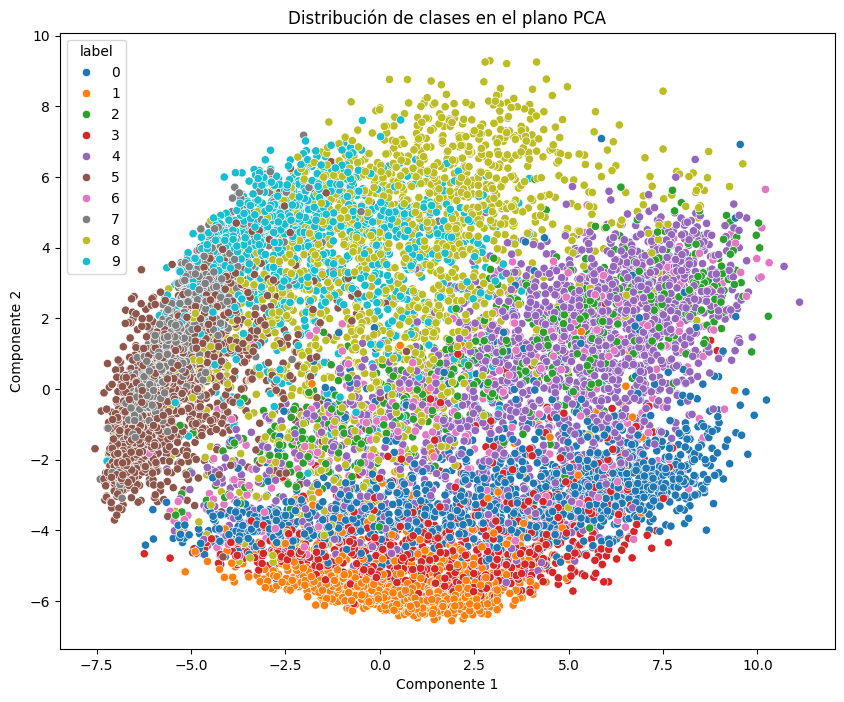

In [33]:
# Utilizamos los primeros dos componentes principales de PCA para visualizar la distribución de clases del conjunto de datos.

vis_df = pd.DataFrame()
vis_df['Componente 1'] = X_pca[:, 0]
vis_df['Componente 2'] = X_pca[:, 1]
vis_df['label'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente 1', y='Componente 2', hue='label', data=vis_df, palette='tab10')
plt.title('Distribución de clases en el plano PCA')

## 2.2 Visualización con TSNE (3 puntos)

Ajuste un modelo de T-SNE utilizando 2 componentes. Justifique la elección de los hiperparámetros utilizados.

Construya un gráfico para visualizar los resultados del modelo.

¿Reconoce algún patrón en los datos? Compare los resultados obtenidos con el gráfico generado en el punto 2.1.

**Observación:**

Cada punto del gráfico debe tener un color de acuerdo a su label (variable y)

RESPUESTA:

Aplicamos el modelo de TSNE con 2 componentes para visualizar los resultados del modelo y luego graficamos los resultados.

Respecto a la elección de los hiperparámetros, utilizamos el número de componentes (solicitado)y el random_state para que el resultado sea reproducible, fuera de eso no se modificó el modelo para poder compararlo de la manera más justa posible con el inciso anterior.

Al analizar el gráfico y compararlo con el del inciso anterior, podemos ver que el modelo TSNE tiene un mejor rendimiento para dividir las clases y distinguir entre agrupaciones de datos. En este sentido vemos que nuevamenta la clase 2 y 6 son las que presentan una agrupación menos clara, principalmente por la cantidad de datos que presentan.



Text(0.5, 1.0, 'Distribución de clases en el plano TSNE')

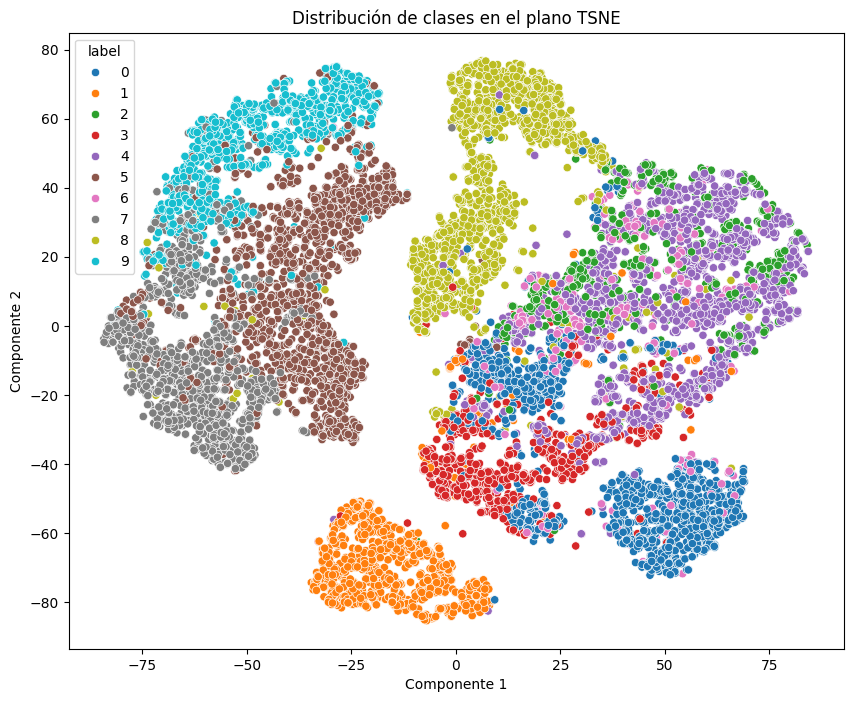

In [36]:
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_pca)

tsne_df = pd.DataFrame()
tsne_df['Componente 1'] = X_tsne[:, 0]
tsne_df['Componente 2'] = X_tsne[:, 1]
tsne_df['label'] = y

plt.figure(figsize=(10, 8))
sns.scatterplot(x='Componente 1', y='Componente 2', hue='label', data=tsne_df, palette='tab10')
plt.title('Distribución de clases en el plano TSNE')
plt.show()


## 2.3 Crear conjuntos train y test (2 puntos)

Cree los conjuntos train y test, a partir del conjunto de datos obtenido en 1.3. Considere un conjuto de test equivalente al 20%.




RESPUESTA

Separamos el dataset en train y test, considerando un 20% para test, además de utilizar stratify para que la proporción de clases en el conjunto de test sea similar a la del conjunto de train (esto en particular es importante debido a la naturaleza del dataset, donde el dataset no se encuentra balanceado en cuanto a la distribución de clases).

In [39]:
# Separamos el dataset en train y test, considerando un 20% para test.
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42, stratify=y)

# Imprimimos las dimensiones de los conjuntos train y test.
print(f"Dimensiones del conjunto de entrenamiento: {X_train.shape}")
print(f"Dimensiones del conjunto de prueba: {X_test.shape}")
print(f"Dimensiones de la variable objetivo de entrenamiento: {y_train.shape}")
print(f"Dimensiones de la variable objetivo de prueba: {y_test.shape}")

Dimensiones del conjunto de entrenamiento: (10080, 86)
Dimensiones del conjunto de prueba: (2520, 86)
Dimensiones de la variable objetivo de entrenamiento: (10080,)
Dimensiones de la variable objetivo de prueba: (2520,)


## 2.4 Entrenar clasificador KNN (6 puntos)

Cree clasificadores utilizando KNeighborsClassifier. Para seleccionar el número de vecinos, ajuste el hiperparámetro en el rango de 3 a 15, tomando la decisión en función de la métrica F1-score (utilice el parámetro average="macro").

Luego, para el mejor clasificador, muestre las métricas de precisión, recall y F1-score por clase. Analice los resultados obtenidos.

**Observación:**

Para la métrica F1-score puede utilizar la siguiente función:

https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html


RESPUESTA: 

Creamos un clasificador KNN para diferentes valores de k y calculamos la métrica F1-score. Luego, seleccionamos el mejor valor de k y mostramos las métricas de precisión, recall y F1-score por clase.

Vemos que el mejor valor para k es 6, con un F1-score de 0.825054863547795.

En cuanto al análisis de las métricas, nuevamente vemos una estrecha relación entre la calidad de las métricas y la cantidad de datos asociados a cada clase.

In [97]:
# Entrenamos el clasificador KNN para diferentes valores de k y calculamos la métrica F1-score.

f1_scores = []

for k in range(3, 16):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    f1_scores.append(f1_score(y_test, y_pred, average="macro"))
    print(f"F1-score para k={k}: {f1_scores[-1]}")

best_k = range(3, 16)[np.argmax(f1_scores)]
print(f"El mejor valor de k es: {best_k}")

# Entrenamos el clasificador KNN con el mejor valor de k.
knn = KNeighborsClassifier(n_neighbors=best_k)
knn.fit(X_train, y_train)

# Calculamos las métricas de precisión, recall y F1-score por clase.
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))


F1-score para k=3: 0.8138490910774303
F1-score para k=4: 0.8154588730011441
F1-score para k=5: 0.8213939745946508
F1-score para k=6: 0.825054863547795
F1-score para k=7: 0.8186180660241845
F1-score para k=8: 0.8141470622493598
F1-score para k=9: 0.8157100738136813
F1-score para k=10: 0.8181524739390882
F1-score para k=11: 0.8161382363851132
F1-score para k=12: 0.8098496189172522
F1-score para k=13: 0.8098970383655197
F1-score para k=14: 0.8112693714198771
F1-score para k=15: 0.810981877921907
El mejor valor de k es: 6
              precision    recall  f1-score   support

           0       0.86      0.97      0.91       300
           1       0.99      0.95      0.97       220
           2       0.71      0.56      0.62       120
           3       0.88      0.81      0.84       160
           4       0.80      0.92      0.85       400
           5       0.97      0.88      0.92       360
           6       0.61      0.25      0.35        80
           7       0.88      0.94      0.91

## 2.5 Evaluación manual de casos (6 puntos)

Para profundizar en el análisis, construya una matriz de confusión que permita identificar en qué clases se producen las principales inconsistencias. Analice los resultados obtenidos.

Luego, considere el label que obtuvo la peor métrica en F1-score. Evalúe 20 casos en los que la etiqueta observada no coincida con la predicción. Presente un gráfico con los elementos considerados (como se visualiza en 1.1).

¿Puede reconocer algún patrón?


**Observación:**

Debe trabajar con el conjunto de test.

RESPUESTA: Se construyó la matriz de confusión y se graficó los errores de la clase con peor F1-score.

En esta ocasión vemos que la clase con peor F1-score es la 6, es decir, la clase de Shirt, situación que si analizamos el gráfico de distribución de clases, nuevamente está asociada a la poca cantidad de datos de este label.

Luego, graficamos los 20 errores de la clase con peor F1-score, donde podemos ver las imágenes que fueron mal clasificadas.

En este caso, respecto a estos errores podemos ver que el modelo falla al predecir el label 6 (Shirt) con 4 (Coat) y 0 (T-shirt/top), esto puede deberse principalmente a que morfologicamente Shirt y Coat son bastante similares, al igual que Shirt y T-shirt/top. Sumando a que en particular el label 6 tiene la menor cantidad de datos asociados, lo que hacer difícil poder entrenar al modelo para que pueda diferenciar Shirt de Coat y T-shirt/top.

<Figure size 1000x800 with 0 Axes>

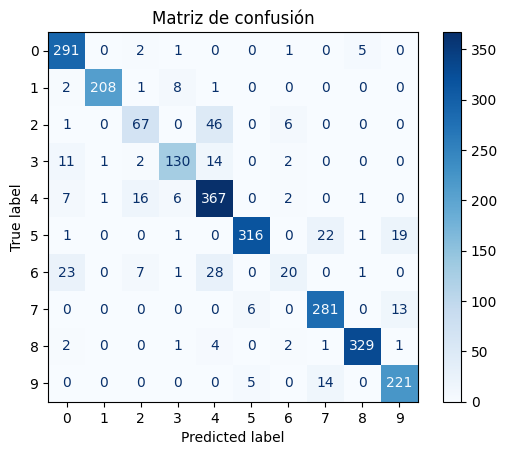

In [55]:
# Matriz de confusión
conf_matrix = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=range(10))

# Graficamos la matriz de confusión
plt.figure(figsize=(10, 8))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de confusión')
plt.show()


Clase con peor F1-score: 6 (0.3540)


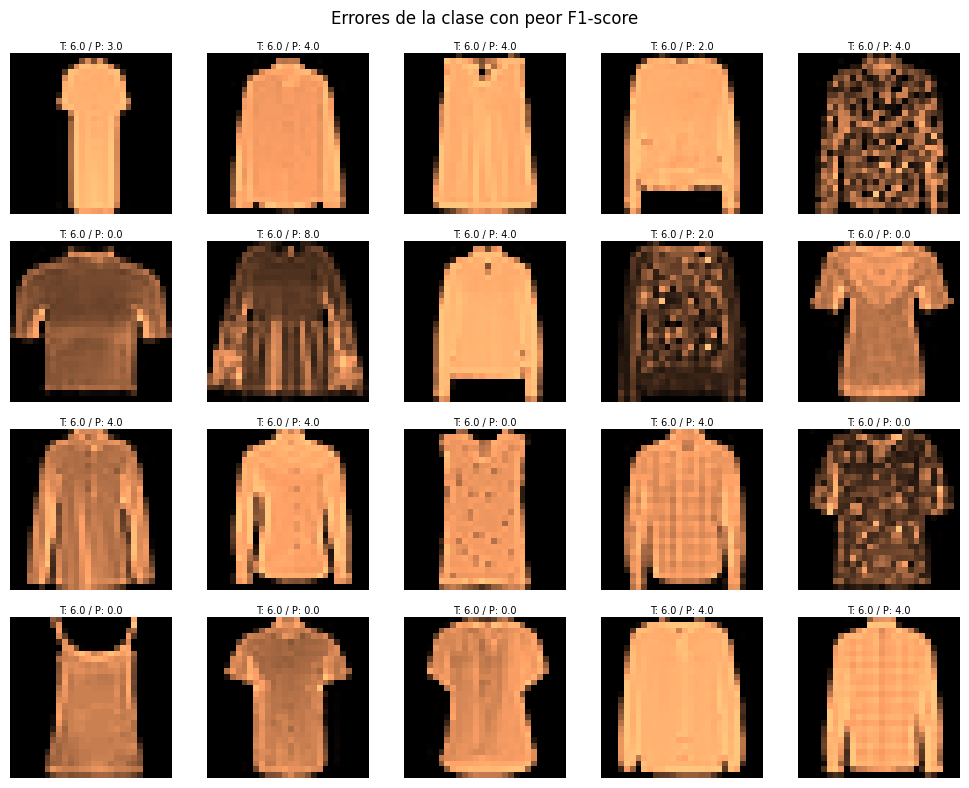

In [78]:
# Calcular el reporte de métricas
report = classification_report(y_test, y_pred, output_dict=True)

# Label con peor F1-score
worst_label = min([k for k in report if k.isdigit()], key=lambda x: report[x]["f1-score"])
print(f"Clase con peor F1-score: {worst_label} ({report[worst_label]['f1-score']:.4f})")

# Recuperamos los datos originales del test antes de aplicar PCA
X_scaled_df = pd.DataFrame(X_scaled)
X_scaled_df["label"] = y  # y es el vector de etiquetas original

X_original_test = X_scaled_df.iloc[y_test.index].copy()
X_original_test["pred"] = y_pred

# Filtramos errores donde la clase real es la peor y fue mal clasificada
error_cases = X_original_test[(X_original_test["label"] == int(worst_label)) & (X_original_test["label"] != X_original_test["pred"])].copy()

# Tomamos los primeros 20 errores
error_20 = error_cases.iloc[:20]

# Graficamos errores según 1.1
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(10, 8))
for idx, ax in enumerate(axs.ravel()):
    pixels = error_20.iloc[idx, :-2].to_numpy().reshape((28, 28))
    true_lbl = error_20.iloc[idx]["label"]
    pred_lbl = error_20.iloc[idx]["pred"]
    ax.imshow(pixels, cmap=plt.cm.copper)
    ax.set_title(f"T: {true_lbl} / P: {pred_lbl}", fontsize=7, pad=3)
    ax.axis("off")

_ = fig.suptitle("Errores de la clase con peor F1-score", fontsize=12)
plt.tight_layout()
plt.show()

In [82]:
# Contar cuántas veces aparece cada clase predicha en los 20 errores
conteo_pred = {}

for pred in error_20["pred"]:
    if pred in conteo_pred:
        conteo_pred[pred] += 1
    else:
        conteo_pred[pred] = 1

# Mostrar el conteo
print("Distribución de etiquetas predichas en los 20 errores:")
for k in sorted(conteo_pred):
    print(f"Predicho como {k}: {conteo_pred[k]} veces")

Distribución de etiquetas predichas en los 20 errores:
Predicho como 0: 7 veces
Predicho como 2: 2 veces
Predicho como 3: 1 veces
Predicho como 4: 9 veces
Predicho como 8: 1 veces


# Parte 3: Creación de datos sintéticos (20 puntos)

En esta sección debe trabajar con los **conjuntos de train** creados en el punto 2.3. Es decir, **X_train** e **y_train**

## 3.1 Ajustar modelo GMM (6 puntos)

Determine el número óptimo de componentes para el modelo Gaussian Mixture Model utilizando la métrica AIC. Considere valores en el intervalo de 1 a 100, con un paso de 5 entre cada valor.

Luego, grafique la relación entre el número de componentes y el valor de la métrica AIC.

**Observación:**

Este paso puede demorar cerca de 30 minutos.

Calculando AIC para 1 componentes...
Calculando AIC para 6 componentes...
Calculando AIC para 11 componentes...
Calculando AIC para 16 componentes...
Calculando AIC para 21 componentes...
Calculando AIC para 26 componentes...
Calculando AIC para 31 componentes...
Calculando AIC para 36 componentes...
Calculando AIC para 41 componentes...
Calculando AIC para 46 componentes...
Calculando AIC para 51 componentes...
Calculando AIC para 56 componentes...
Calculando AIC para 61 componentes...
Calculando AIC para 66 componentes...
Calculando AIC para 71 componentes...
Calculando AIC para 76 componentes...
Calculando AIC para 81 componentes...
Calculando AIC para 86 componentes...
Calculando AIC para 91 componentes...
Calculando AIC para 96 componentes...
El mejor número de componentes es: 96


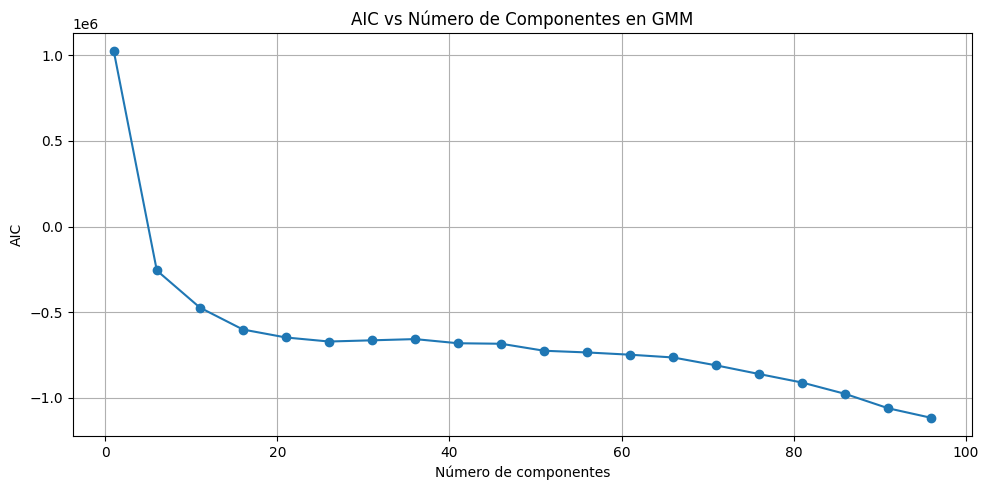

In [83]:
# Intervalos de 1 a 100 con un paso de 5 entre cada valor.
intervalos = range(1, 101, 5)

# Lista para almacenar los valores de AIC
aic_values = []

# Bucle para calcular AIC para cada número de componentes
for n in intervalos:
    print(f"Calculando AIC para {n} componentes...")
    gmm = GaussianMixture(n_components=n, random_state=42)
    gmm.fit(X_train)
    aic_values.append(gmm.aic(X_train))

# Optimo número de componentes
lowest_aic = min(aic_values)
best_n = intervalos[aic_values.index(lowest_aic)]
print(f"El mejor número de componentes es: {best_n}")

# Graficar la relación entre el número de componentes y el valor de la métrica AIC
plt.figure(figsize=(10, 5))
plt.plot(intervalos, aic_values, marker='o')
plt.title("AIC vs Número de Componentes en GMM")
plt.xlabel("Número de componentes")
plt.ylabel("AIC")
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.2 Crear datos sintéticos (8 puntos)

Cree una muestra de 30 elementos sintéticos utilizando el mejor modelo ajustado en el punto anterior.

Luego, grafique los datos generados y comente sobre su calidad.



RESPUESTA:

Dado el mejor número de componentes (96), generamos 30 muestras sintéticas y graficamos los datos generados en comparación con los datos reales.

En cuanto a la calidad, vemos que los datos gmm se encuentran dentro del dominio de los datos asociados a el conjunto de prueba, indicando que a rasgos generales el modelo si fue capaz de generar datos sintéticos que se asemejan a los datos reales. Además en cuanto a la distribución, vemos que si se encuentran distribuidos de manera similar a los datos reales, por lo que el modelo si es capaz de generar datos sintéticos que se asemejan a los datos reales.


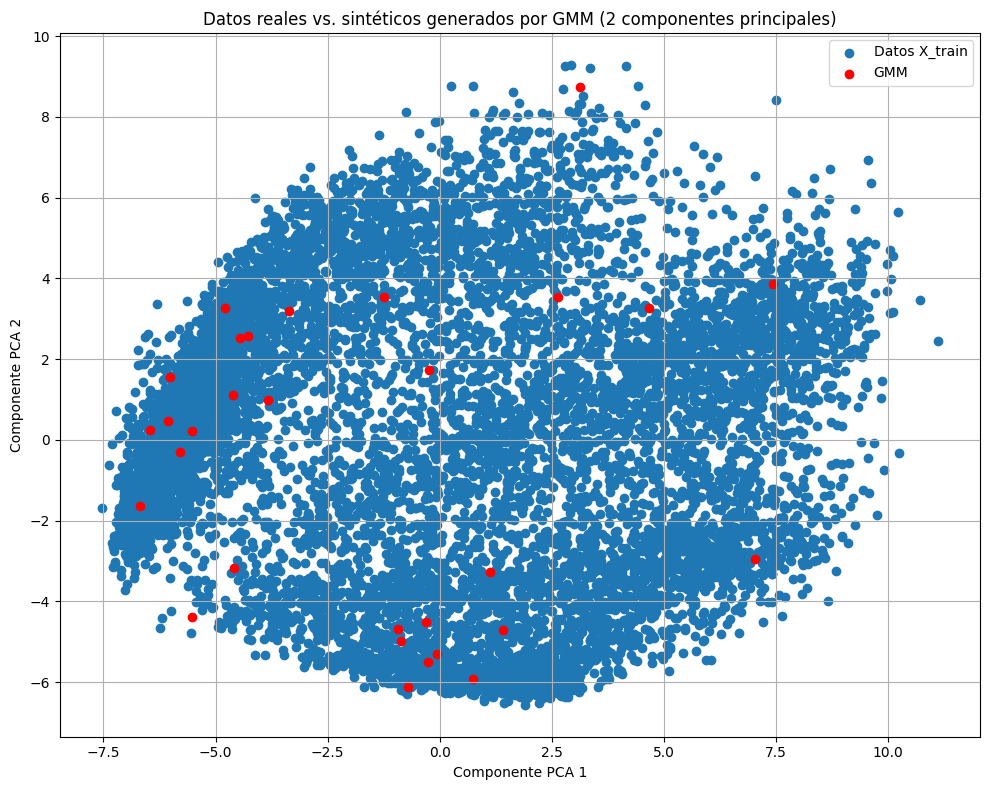

In [ ]:
gmm = GaussianMixture(n_components=best_n, random_state=42)
gmm.fit(X_train)

# Generar 30 muestras sintéticas
samples = gmm.sample(30)[0]

# Obtener los dos primeros componentes directamente del resultado del modelo
samples_2d = samples[:, :2]
X_train_2d = X_train[:, :2]

# Graficar
plt.figure(figsize=(10, 8))
plt.scatter(X_train_2d[:, 0], X_train_2d[:, 1], label="Datos X_train")
plt.scatter(samples_2d[:, 0], samples_2d[:, 1], color="red", label="GMM")
plt.title("Datos reales vs. sintéticos generados por GMM (2 componentes principales)")
plt.xlabel("Componente PCA 1")
plt.ylabel("Componente PCA 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 3.3 Evaluar calidad (6 puntos)

Aplique el clasificador creado en el punto 2.4 sobre los ejemplos sintéticos generados.

¿El clasificador es capaz de detectar correctamente las imágenes?

Analice los resultados obtenidos.



RESPUESTA: 

Aplicamos el clasificador sobre los ejemplos sintéticos generados y vemos la distribución de las predicciones, en particular al tratarse de datos generados, no podemos saber si el modelo es capaz de detectar correctamente las imágenes, sin embargo vemos que el modelo si es capaz de clasificar correctamente las muestras.

En cuanto a la distribución de las asignaciones, vemos que hace parcialmente sentido y es coherente con la distribución de las clases en el conjunto de prueba. Donde vemos por ejemplo que la clase 6 tiene solo 1 asignación (coherente con la que menor datos tiene), mientras que la clase 5 tiene 7 asignaciones (coherente con la que tiene más datos) y la clase 4 tiene solo 4 (siendo que es la con más datos). Situación que puede deberse a la aleatoriedad de la generación de los datos sintéticos y la poca cantidad de datos sinteticos generados.

In [112]:
# Aplicamos el clasificador sobre los ejemplos sintéticos generados
y_pred_synthetic = knn.predict(samples)

# Verificamos si puedo clasificar correctamente las muestras
print(f"Cantidad de muestras sintéticas: {len(samples)}")
print(f"Cantidad de predicciones realizadas: {len(y_pred_synthetic)}\n")

# Vemos la distribución de las predicciones
conteo_pred = {}
for pred in y_pred_synthetic:
    if pred in conteo_pred:
        conteo_pred[pred] += 1
    else:
        conteo_pred[pred] = 1

total_predichos = sum(conteo_pred.values())


print("Distribución de etiquetas predichas:")
for k in sorted(conteo_pred):
    print(f"Predicho como clase {k}: {conteo_pred[k]} veces")

Cantidad de muestras sintéticas: 30
Cantidad de predicciones realizadas: 30

Distribución de etiquetas predichas:
Predicho como clase 0: 1 veces
Predicho como clase 1: 4 veces
Predicho como clase 2: 1 veces
Predicho como clase 3: 3 veces
Predicho como clase 4: 4 veces
Predicho como clase 5: 7 veces
Predicho como clase 6: 1 veces
Predicho como clase 7: 3 veces
Predicho como clase 8: 3 veces
Predicho como clase 9: 3 veces


# Parte 4: Reglas de asociación (12 puntos)

# Parte 4: Reglas de asociación (12 puntos)

En esta sección se trabajará con un dataset que simula el comportamiento de usuarios en una plataforma de streaming 🎥, registrando las series de TV que han visualizado. Cada fila del archivo representa a un usuario distinto (un total de 100 usuarios) e incluye una lista de las series que ha visto un usuario durante un período determinado.

Las series están separadas por comas (",").

El dataset está disponible en Canvas.

## 4.1 Carga de datos y One hot encoding (3 puntos)

Cargue el dataset utilizando la función read_csv de pandas. ¿Cuál o cuáles son las series más frecuentes dentro del dataset?

Luego, utilice TransactionEncoder() para codificar las transacciones en vectores.

RESPUESTA

En primer lugar, cargamos el dataset y transformamos cada fila en una lista de series. Luego, vemos las series más frecuentes y codificamos las transacciones en vectores.

Vemos que las series más frecuentes son:

- Breaking Bad: 93 apariciones
- Better Call Saul: 89 apariciones
- Stranger Things: 23 apariciones
- Peaky Blinders: 20 apariciones
- The Umbrella Academy: 20 apariciones
- The Crown: 20 apariciones
- Game of Thrones: 19 apariciones
- Narcos: 18 apariciones
- Black Mirror: 18 apariciones
- Ozark: 17 apariciones
- The Witcher: 17 apariciones
- The Mandalorian: 17 apariciones
- Money Heist: 16 apariciones
- The Office: 16 apariciones
- The Boys: 15 apariciones
- Bridgerton: 14 apariciones
- Wednesday: 14 apariciones
- Friends: 14 apariciones
- Lupin: 12 apariciones
- Dark: 6 apariciones

Posteriormente, codificamos las transacciones en vectores y mostramos el DataFrame codificado.

In [123]:
# Cargamos el dataset (cada fila es una lista de series separadas por comas)
df_tv = pd.read_csv("tv_shows.csv", header=None)

# Transformamos cada fila en una lista de series
transactions = df_tv[0].apply(lambda x: x.split(","))

# Vemos las series más frecuentes
serie_counts = {}

for usuario in transactions:
    for serie in usuario:
        serie = serie.strip()
        if serie in serie_counts:
            serie_counts[serie] += 1
        else:
            serie_counts[serie] = 1

# Mostramos ranking de series más frecuentes
print("Series más frecuentes:")
for serie, count in sorted(serie_counts.items(), key=lambda x: x[1], reverse=True):
    print(f"{serie}: {count} apariciones")


Series más frecuentes:
Breaking Bad: 93 apariciones
Better Call Saul: 89 apariciones
Stranger Things: 23 apariciones
Peaky Blinders: 20 apariciones
The Umbrella Academy: 20 apariciones
The Crown: 20 apariciones
Game of Thrones: 19 apariciones
Narcos: 18 apariciones
Black Mirror: 18 apariciones
Ozark: 17 apariciones
The Witcher: 17 apariciones
The Mandalorian: 17 apariciones
Money Heist: 16 apariciones
The Office: 16 apariciones
The Boys: 15 apariciones
Bridgerton: 14 apariciones
Wednesday: 14 apariciones
Friends: 14 apariciones
Lupin: 12 apariciones
Dark: 6 apariciones


In [147]:
# Codificamos las transacciones en vectores
encoder = TransactionEncoder()
array = encoder.fit(transactions).transform(transactions)

# Creamos un DataFrame con las transacciones codificadas
df_encoded = pd.DataFrame(array, columns=encoder.columns_)

# Mostramos el DataFrame 
print("DataFrame codificado:")
print(df_encoded.head())


DataFrame codificado:
   Better Call Saul  Black Mirror  Breaking Bad  Bridgerton   Dark  Friends  \
0             False          True          True       False   True    False   
1              True         False          True        True  False    False   
2              True         False          True       False  False     True   
3              True         False          True       False  False     True   
4              True         False          True       False  False    False   

   Game of Thrones  Lupin  Money Heist  Narcos  Ozark  Peaky Blinders  \
0            False  False        False    True   True           False   
1            False  False        False   False  False           False   
2            False  False        False   False  False           False   
3            False  False        False   False  False           False   
4             True  False        False    True  False           False   

   Stranger Things  The Boys  The Crown  The Mandalorian  The Of

## 4.2 Matriz de co-ocurrencia (3 puntos)



Genera la matriz de co-ocurrencia para observar con qué frecuencia las series de TV aparecen juntas.

¿Qué pares de series parecen estar fuertemente relacionadas, sin considerar la diagonal de la matriz?

¿Qué hipótesis puedes plantear sobre por qué estas series se ven juntas?



RESPUESTA 

En primer lugar modificamos el DataFrame codificado para que los valores sean 1 y 0. Luego, calculamos la matriz de co-ocurrencia y eliminamos la diagonal ya que es co-ocurrencia consigo mismo. Finalmente, obtenemos los pares con mayor co-ocurrencia y mostramos los 10 pares de series con mayor co-ocurrencia.

Vemos que las series más frecuentes son:
- Breaking Bad, Better Call Saul: 82
- Breaking Bad, Stranger Things: 20
- The Umbrella Academy, Breaking Bad: 19
- Game of Thrones, Breaking Bad: 18
- Better Call Saul, Game of Thrones: 17
- Narcos, Breaking Bad: 16
- Breaking Bad, The Mandalorian: 15
- Better Call Saul, Narcos: 14
- Friends, Breaking Bad: 13
- Better Call Saul, Friends: 12

Vemos que en general que sin comparamos con el ejercicio anterior, las series que aparecen con mayor frecuencia son las que tienen más apariciones en el dataset de co-ocurrencia, situación que es bastante lógica ya que de lo contrario no tendría sentido que tengan mayor predominancia en el dataset.

In [149]:
# Matriz de co-ocurrencia
# Cambiamos True por 1 y False por 0
df_encoded = df_encoded.astype(int)

# Calculamos la matriz de co-ocurrencia
matrix = df_encoded.T @ df_encoded

# Eliminamos la diagonal ya que es co-ocurrencia consigo mismo
for col in matrix.columns:
    matrix.loc[col, col] = 0

# Obtenemos los pares con mayor co-ocurrencia
best_pairs = matrix.unstack().sort_values(ascending=False)

# Eliminamos los duplicados AB - BA
best_pairs = best_pairs[best_pairs > 0].drop_duplicates()

# Mostramos los 10 pares de series con mayor co-ocurrencia
for i in range(10):
    print(best_pairs.index[i], best_pairs.values[i])


('Breaking Bad', 'Better Call Saul') 82
('Breaking Bad', 'Stranger Things') 20
('The Umbrella Academy', 'Breaking Bad') 19
('Game of Thrones', 'Breaking Bad') 18
('Better Call Saul', 'Game of Thrones') 17
('Narcos', 'Breaking Bad') 16
('Breaking Bad', 'The Mandalorian') 15
('Better Call Saul', 'Narcos') 14
('Friends', 'Breaking Bad') 13
('Better Call Saul', 'Friends') 12


## 4.3 Algoritmo Apriori (3 puntos)

Aplica el algoritmo Apriori con min_support = 0.2 y analiza los resultados obtenidos.

A continuación, genera las reglas de asociación utilizando association_rules, con un umbral min_threshold = 0.6, y comenta los resultados obtenidos.

¿Cómo podrían estas reglas ser utilizadas para hacer recomendaciones personalizadas a los usuarios?

RESPUESTA

Aplicamos el algoritmo Apriori con min_support = 0.2 y analizamos los resultados obtenidos.

Vemos una fuertre presencia de Breaking Bad, con un soporte de 0.93, seguido por Better Call Saul con un soporte de 0.89 y luego la combinación de ambas series con un soporte de 0.82, evidenciando una fuerte correlación entre ambas series.

A nivel de aplicación para hacer recomendaciones personalizadas a los usuarios, podríamos utilizar las reglas de asociación para recomendar series a los usuarios basándonos en las series que tienen más correlación con las que el usuario ha visto.

De todas maneras debemos considerar que el parámetro lift es bastante cercano a 1 de igual manera, cosa que significa que si bien la correlación es alta, también la probabilidad por azar de que esto ocurra es bastante alta, por lo que no necesariamente es algo que surge naturalmente por la asociación de las series.

In [154]:
# Aplicamos el algoritmo Apriori
apriori_result = apriori(df_encoded, min_support=0.2, use_colnames=True)

# Mostramos los resultados ordenados
print("Frecuencias de itemsets:")
print(apriori_result.sort_values(by="support", ascending=False))

Frecuencias de itemsets:
   support                          itemsets
1     0.93                    (Breaking Bad)
0     0.89                (Better Call Saul)
6     0.82  (Breaking Bad, Better Call Saul)
3     0.23                 (Stranger Things)
2     0.20                  (Peaky Blinders)
4     0.20                       (The Crown)
5     0.20            (The Umbrella Academy)
7     0.20   (Breaking Bad, Stranger Things)


/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


In [155]:
# Generamos las reglas de asociación
rules = association_rules(apriori_result, metric="confidence", min_threshold=0.6)

# Mostramos las reglas ordenadas
print("\nReglas de asociación:")
print(rules.sort_values(by="confidence", ascending=False))



Reglas de asociación:
          antecedents         consequents  antecedent support  \
1  (Better Call Saul)      (Breaking Bad)                0.89   
0      (Breaking Bad)  (Better Call Saul)                0.93   
2   (Stranger Things)      (Breaking Bad)                0.23   

   consequent support  support  confidence      lift  representativity  \
1                0.93     0.82    0.921348  0.990697               1.0   
0                0.89     0.82    0.881720  0.990697               1.0   
2                0.93     0.20    0.869565  0.935016               1.0   

   leverage  conviction  zhangs_metric   jaccard  certainty  kulczynski  
1   -0.0077    0.890000      -0.078652  0.820000  -0.123596    0.901534  
0   -0.0077    0.930000      -0.118280  0.820000  -0.075269    0.901534  
2   -0.0139    0.536667      -0.082787  0.208333  -0.863354    0.542309  


## 4.4 Aplicación del Algoritmo Apriori Excluyendo 'Better Call Saul' y 'Breaking Bad' (3 puntos)

Vuelve a aplicar el algoritmo Apriori utilizando la matriz de vectores normalizados (one-hot encoding), excluyendo las series 'Better Call Saul' y 'Breaking Bad'.

Prueba el algoritmo variando el hiperparámetro min_support en los valores [0.05, 0.1, 0.2]. Luego, para el min_threshold, prueba valores en el rango [0.1, 0.3, 0.6].

¿Es posible generar reglas utilizando los mismos valores de hiperparámetro utilizados en el punto 4.3? Si no se generan reglas, ajusta los valores dentro de los rangos de parámetros posibles para cada uno y comenta los resultados.

Finalmente, explica qué significan los hiperparámetros min_support y min_threshold en el contexto del algoritmo Apriori.


RESPUESTA

Al aplicar el algoritmo Apriori excluyendo las series 'Better Call Saul' y 'Breaking Bad' vemos que:

Cuando usamos  min_support bajo (0.05) y una confianza mínima de 0.1, se logran generar 14 reglas. Esto muestra que al bajar ambos parámetros es posible encontrar relaciones entre series, aunque sean más débiles. Por otra parte, al subir el min_threshold, la cantidad de reglas baja mucho, y con una confianza de 0.6 no se genera ninguna. Finalmente, vemos que  si subimos el min_support, aparecen muy pocos conjuntos frecuentes. Esto pasa porque al sacar “Breaking Bad” y “Better Call Saul”, que eran las más vistas, ya no hay muchas combinaciones que se repitan en varios usuarios.

De esta forma, vemos que al eliminar las series más frecuentes, el algoritmo no pudo generar reglas com los mismos parámetros que en 4.3, de esta forma se ajustó el modelo en los rangos solicitados.

En cuanto al significado de los hiperparámetros, vemos que min_support es la frecuencia mínima de aparición de un itemset para ser considerado frecuente, mientras que min_threshold es el umbral de confianza mínima para considerar una regla como relevante.


In [160]:
df_filtered = df_encoded.drop(columns=['Better Call Saul', 'Breaking Bad'])

# Aplicamos el algoritmo Apriori
min_support_values = [0.05, 0.1, 0.2]
min_threshold_values = [0.1, 0.3, 0.6]

for min_support in min_support_values:
    print(f"\n min_support = {min_support}")
    frequent_itemsets = apriori(df_filtered, min_support=min_support, use_colnames=True)
    print(f"Conjuntos frecuentes encontrados: {len(frequent_itemsets)}")

    for min_threshold in min_threshold_values:
        rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=min_threshold)
        print(f"  → min_threshold = {min_threshold} → Reglas generadas: {len(rules)}")



 min_support = 0.05
Conjuntos frecuentes encontrados: 25
  → min_threshold = 0.1 → Reglas generadas: 14
  → min_threshold = 0.3 → Reglas generadas: 6
  → min_threshold = 0.6 → Reglas generadas: 0

 min_support = 0.1
Conjuntos frecuentes encontrados: 17
  → min_threshold = 0.1 → Reglas generadas: 0
  → min_threshold = 0.3 → Reglas generadas: 0
  → min_threshold = 0.6 → Reglas generadas: 0

 min_support = 0.2
Conjuntos frecuentes encontrados: 4
  → min_threshold = 0.1 → Reglas generadas: 0
  → min_threshold = 0.3 → Reglas generadas: 0
  → min_threshold = 0.6 → Reglas generadas: 0


/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
/Users/vicentelavagnino/Desktop/IIC2433-GH/venv_umap/lib/python3.11/site-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(


**Referencias:**

Se utilizarons los ppts y códigos del curso, documentación oficial de las librerías utilizadas y se utilizó copilot para facilitar la escritura de código.